In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the dataset (assuming it's stored in a file)
df= pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Separate features and labels
X = df.drop("target", axis=1)
y = df["target"]

X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [5]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Create and train the MLP model
classifier = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter=1000).fit(X_train,y_train)

In [ ]:
# Make predictions on the testing set
predictions = classifier.predict(X_test)

res_df = pd.DataFrame({"Predicted": predictions, "Actual Labels": y_test})
res_df

,Predicted,Actual Labels
527,1,1
359,1,1
447,0,0
31,1,1
621,0,0
...,...,...
832,1,1
796,1,1
644,1,1
404,0,0


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 98.54%


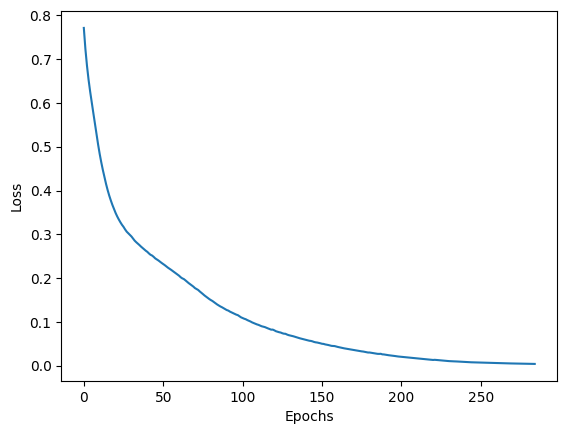

In [16]:
# Plot the error convergence
training_loss = classifier.fit(X_train,y_train).loss_curve_

plt.plot(training_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))

[[102   0]
 [  3 100]]


In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

